<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> Fourth section : Conclusion </center>


In this notebook you will be comparing the results of the two methods we used on the created testset. That is said: you will compare the results to the clustering with the results of the classification on the same test test and provide insights and explanation about the observed behaviour.

For this final task you will need to : 
1. Load the testset data that you created all along this project 
2. For each cluster provide percentages about each actual/ predicted class contained with this cluster. Eg : cluster N°2 : is made of ( 50% class 2 and 50% class 3 ) from actual labels and ( 40 % predicted class 2 and 40% predicted class 3 + 20% predicted class 1) 
The above is just an example and is far away from the actual situation.

3. Explain the behaviour and provide isights about it 

## 1.  Load the data: 

In [2]:
import pandas as pd 

In [3]:
# To-Do : load the test summary data 
df = pd.read_csv("outputs/test_summary.csv")

In [4]:
df.head()

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster,Predicted_class
0,3,0.0,32,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,3,0.0
1,9,0.0,32,1.0,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,3,0.0
2,13,0.0,33,1.0,36.3,78.6,23.6,22.0,7.0,8.56,5.38,78.0,19.4,68.7,3,0.0
3,21,0.0,33,1.0,44.3,49.8,32.1,21.6,13.1,7.44,5.59,103.0,30.2,74.0,3,0.0
4,25,0.0,34,1.0,40.5,32.4,29.6,27.1,5.8,10.50,4.56,91.0,26.6,72.0,3,0.0


## 2. Analysis: 

In [109]:
# To-Do create a summary about each cluster : 
# percentages of each target (actual Category) within each cluster 
# + Percentages of each predicted class within the cluster 
# results should be something like : 
# For clusterk : {'true_class0_percetage': 0.0,
#                 'true_class1_percetage': 0.0,
#                  'true_class2_percetage': 0.0,
#                   'true_class3_percetage': 0.0,
#                   'true_class4_percetage': 0.0,
#                   'predicted_class0_percetage': 0.0,
#                   'predicted_class1_percetage': 0.0,
#                   'predicted_class2_percetage': 0.0,
#                   'predicted_class3_percetage': 0.0,
#                    'predicted_class4_percetage': 0.0}

In [5]:
def percentage_classe_in(class_name:float,column_name:str, dataset:pd.DataFrame)->float:
    return dataset[dataset[column_name]==class_name].count()["Category"]/dataset[column_name].count()

def clusters_summary(dataset:pd.DataFrame):
    result = {}
    for cluster in dataset["cluster"].unique():
        tmp = dataset[dataset["cluster"]==cluster]
        print(f'#-----------------------  Summary Cluster {cluster}  -----------------------#')
        classes = []
        for class_name in dataset["Category"].unique():
            print(f"**** Class {class_name} ****\n")
            true_class = percentage_classe_in(class_name=class_name,column_name="Category",dataset=tmp)
            predicted_class = percentage_classe_in(class_name=class_name,column_name="Predicted_class",dataset=tmp)
            print(f'True percentage : {true_class*100}% | Predicted percentage : {predicted_class*100}%\n')
            
            classes.append({"True_"+str(class_name): true_class,
                                               "Predicted_"+str(class_name): predicted_class})
        result["cluster_"+str(cluster)] = classes
    return result

results = clusters_summary(df)    

#-----------------------  Summary Cluster 3  -----------------------#
**** Class 0.0 ****

True percentage : 97.82608695652173% | Predicted percentage : 90.21739130434783%

**** Class 1.0 ****

True percentage : 0.0% | Predicted percentage : 0.0%

**** Class 2.0 ****

True percentage : 2.1739130434782608% | Predicted percentage : 1.0869565217391304%

**** Class 3.0 ****

True percentage : 0.0% | Predicted percentage : 5.434782608695652%

**** Class 4.0 ****

True percentage : 0.0% | Predicted percentage : 3.260869565217391%

#-----------------------  Summary Cluster 4  -----------------------#
**** Class 0.0 ****

True percentage : 62.96296296296296% | Predicted percentage : 85.18518518518519%

**** Class 1.0 ****

True percentage : 3.7037037037037033% | Predicted percentage : 0.0%

**** Class 2.0 ****

True percentage : 11.11111111111111% | Predicted percentage : 3.7037037037037033%

**** Class 3.0 ****

True percentage : 11.11111111111111% | Predicted percentage : 0.0%

**** Class 4.

## 3. Explanations and isights :

In [1]:
# in this section you should display analysis about each cluster and comment those one by one 

First lets see which clusters do we have in the test dataset

In [30]:
df["cluster"].unique()

array([3, 4, 1, 0], dtype=int64)

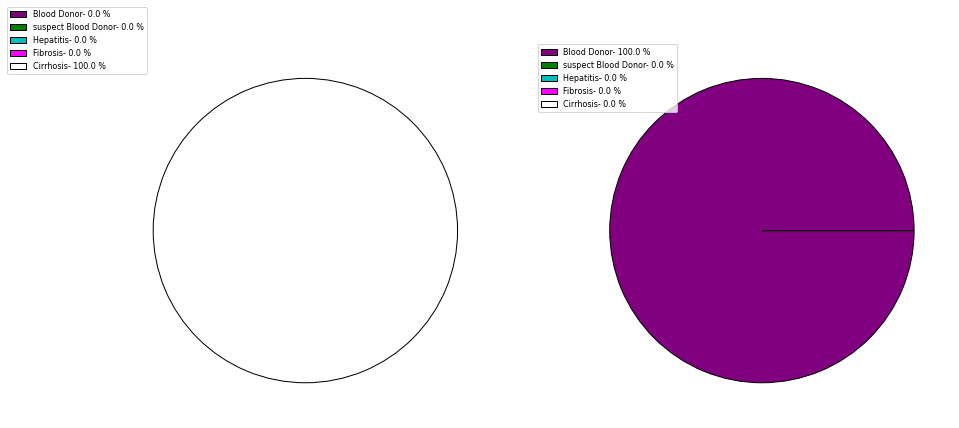

In [46]:
import matplotlib.pyplot as plt
import numpy as np


def plot_pie(cluster_name:str,cluster:dict):
    # Real Class Labels
    class_labels = ["Blood Donor","suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"]

    # True class labels 
    classes_data = [dict[list(dict.keys())[0]] for dict in cluster]

    # Predicted data
    classes_data_predicted = [dict[list(dict.keys())[1]] for dict in cluster]


    # Plot the Pie chart for True Category classes
    pie, axes = plt.subplots(1,2,figsize=[15,10])
    
    patches1, texts = axes[0].pie(classes_data,textprops={"color":"black","fontsize":9,'fontweight':'bold'},
                                        colors=["purple",'g','c','magenta',"white"],wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True,"edgecolor":"k"})
    true_labels = [f'{label}- {round(pct*100,1)} %' for (label,pct) in zip(class_labels,classes_data)]
    axes[0].legend(patches1, true_labels, loc='center', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
    axes[0].set_title(f"True Class Distribution in {cluster_name}", fontsize=16,color="white",loc="center")

    # Pie chart for predicted Category classes
    patches2, texts = axes[1].pie(classes_data_predicted,textprops={"color":"black","fontsize":9,'fontweight':'bold'},
                                        colors=["purple",'g','c','magenta',"white"],wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True,"edgecolor":"k"})
    predicted_labels = [f'{label}- {round(pct*100,1)} %' for (label,pct) in zip(class_labels,classes_data_predicted)]
    axes[1].legend(patches2, predicted_labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
    axes[1].set_title(f"Predicted Class Distribution in {cluster_name}", fontsize=16,color="white",loc="center")
    #pie.savefig("outputs/"+cluster_name+".png")

plot_pie(cluster_name="cluster_0",cluster=results["cluster_0"])

As we can see for Cluster 0 : the True category is Cirrhosis. However :
- All the predictions from the supervised-learning model were wrong, and were miss-classified all to be Fibrosis
- The clustering model (unsupervised-learning) performed well in the other hand, since all the instances within it were all from the same class, so we can say that this cluster is for patients having Cirrhosis

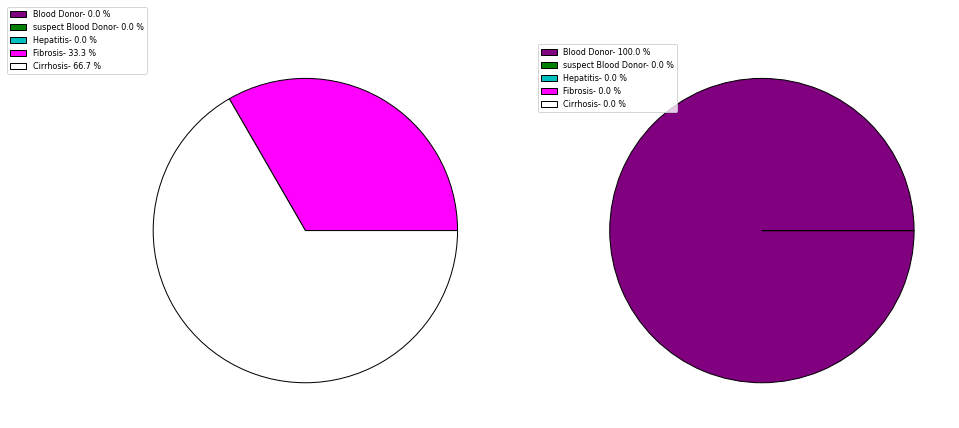

In [47]:
plot_pie(cluster_name="cluster_1",cluster=results["cluster_1"])

In cluster 1 : There are 2 patients categories : Cirrhosis and Fibrosis
- Classification model predicted the wrong categorie as it predicted the patients to be Blood Donors
- Clustering model also didn't perform well as it grouped 2 different categories in the same cluster especially that the percentage of patients having Cirrhosis is high in this cluster while they should have been grouped into the cluster 0

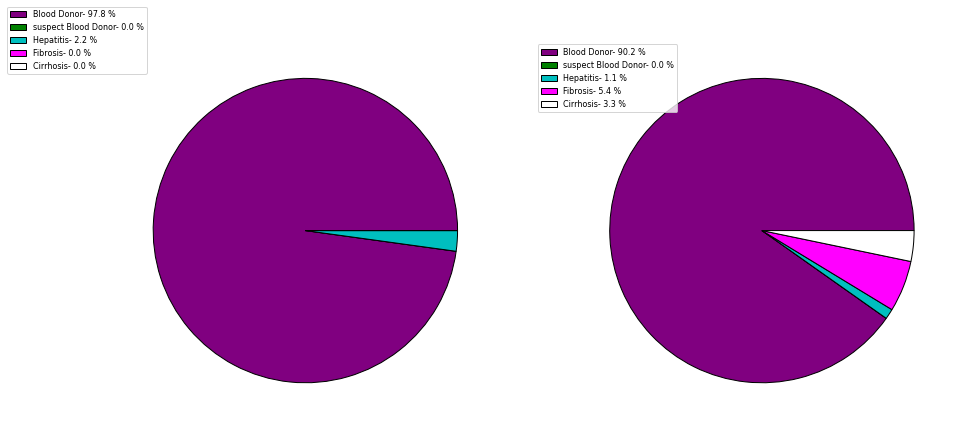

In [48]:
plot_pie(cluster_name="cluster_3",cluster=results["cluster_3"])

In cluster 3 : Most patient are Blood donor 97.8% and 2.2% have Hepatitis
- Classification model predicted correctly 90.2% of the blood donors correctly and only 1.1% of patients with Hepatitis, while the 8.7% that's left was miss-classified
- Clustering model didn't perform badly as 97.8% of patients were Blood Donors

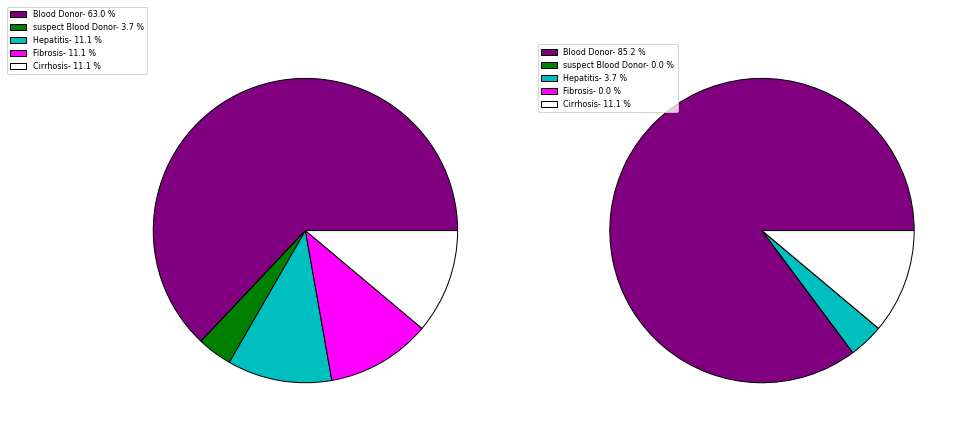

In [49]:
plot_pie(cluster_name="cluster_4",cluster=results["cluster_4"])

In cluster 4 : all type of patients were present
- Classification model was able to predict only 3 classes out of 5
- Clustering model performed bad in the other side, as it grouped 5 different categories to the same cluster

## 4. Conclusion:

Explain your findings and provide reasons for the behaviour.

As we saw above:
- The category **"Blood Donor"** Was always predicted , we can explain this behaviour by the fact that our dataset was composed mostly of patients being donors which biased our model
- The category **"Hepatitis"** , it was predicted whenever it was present we can explain this by the fact that there is a good amount of data of this category in the dataset
- The Category **"Suspect Blood Donor"**, the model was never able to predict it as there is a really small amount of patients who were Blood donors.

We saw earlier:
- The accuracy of the classifier and the precision were 92% which is a good score. However the accuracy measures the percentage of true positives and true negatives from all over the data, and the precision measures the percentage of True positives from all the positives that exists (True and False ones). Therefore none of these measures gives insights about the false predictions which were really important in this case.

As a conclusion :
- we can say that the dataset is imbalanced ( too many patients being Blood donors), which caused the classifier to be biased, therefore having false predictions
- supervised-learning algorithm worked better than the unsupervised-learning algorithm, since the dataset is imbalanced the classes are not separable therefore the clustering failed
- Precision and accuracy are not good measures for imbalanced datasets.